In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
import matplotlib.pyplot as plt
import math
import seaborn as sns
import datetime as dt
from matplotlib.patches import Rectangle
from matplotlib.colors import rgb2hex

sns.set_style("darkgrid")

In [ ]:
q1 = pd.read_csv("queries_csv\query1.csv", sep=",") 
q2 = pd.read_csv("queries_csv\query2.csv", sep=",")
q3 = pd.read_csv("queries_csv\query3.csv", sep=",")
q4 = pd.read_csv("queries_csv\query4.csv", sep=",")
q5 = pd.read_csv("queries_csv\query5.csv", sep=",")
q6 = pd.read_csv("queries_csv\query6.csv", sep=",")
q7 = pd.read_csv("queries_csv\query7.csv", sep=",")
q8 = pd.read_csv("queries_csv\query8.csv", sep=",")
q9 = pd.read_csv("queries_csv\query9.csv", sep=",")
q10 = pd.read_csv("queries_csv\query10.csv", sep=",")  

1 - How much rock sales in the USA per year?

In [3]:
q1

,year_,name,country_,quantity_of_music
0,2013,Rock,USA,38
1,2009,Rock,USA,32
2,2010,Rock,USA,31
3,2012,Rock,USA,30
4,2011,Rock,USA,26


In [4]:
q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
year_                5 non-null int64
name                 5 non-null object
country_             5 non-null object
quantity_of_music    5 non-null int64
dtypes: int64(2), object(2)
memory usage: 240.0+ bytes


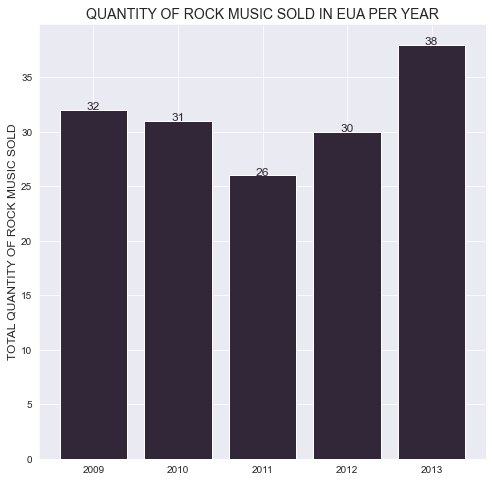

In [35]:
year_rock = q1.year_
quant_rock = q1.quantity_of_music 

plt.figure(figsize=(8, 8))
ind_y = year_rock.values 
value_y = quant_rock.values

plt.bar(ind_y, value_y, color="#322738")

plt.title("Quantity of Rock Music sold in EUA per year".upper(), fontsize=14, loc="center")

plt.ylabel("Total Quantity of Rock Music sold".upper(), fontsize=12)

for i in range(len(quant_rock)):
    plt.annotate(str(quant_rock[i]), xy=(year_rock[i],quant_rock[i]), ha="center", fontsize=12, color="#322738")
    
plt.show;


2 - For each year, which were the 5 most cities that buyed and how much in dolars.

In [6]:
q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
year_     5 non-null int64
city_     5 non-null object
total_    5 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 200.0+ bytes


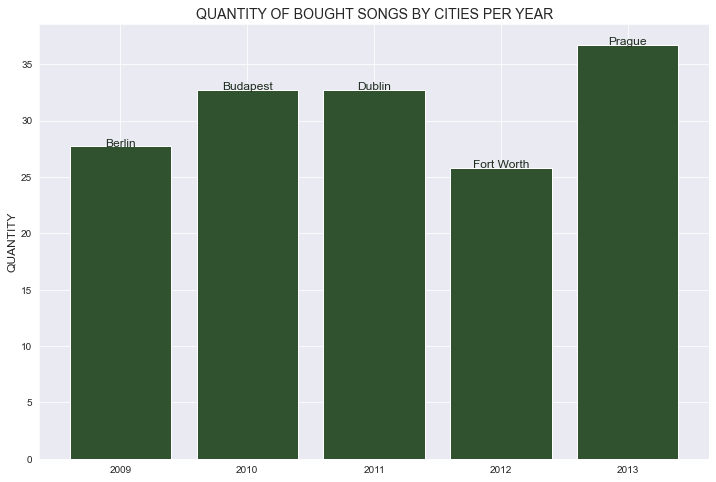

In [7]:
city_2 = q2.city_.tolist()
total_2 = q2.total_
year_2 = q2.year_
    
ax = plt.figure(figsize=(12,8))
ax = plt.bar(year_2, total_2, color='#30522e')

ax = plt.title("Quantity of bought songs by cities per year".upper(), fontsize=14, loc="center")

plt.ylabel("Quantity".upper(), fontsize=12)

for i in range(len(city_2)):
    plt.annotate(str(city_2[i]), xy=(year_2[i],total_2[i]), ha="center", fontsize=12, color="#1c2b1b")

plt.show();


3 - What were the 5 most sold songs (with artist) in terms of values?

In [8]:
q3 = q3.reindex(q3.total_val.sort_values().index)
q3

,music_artist,total_quant,total_val
1,Eruption - Van Halen,4,3.96
2,Hallowed Be Thy Name - Iron Maiden,4,3.96
3,Sure Know Something - Kiss,4,3.96
4,The Number Of The Beast - Iron Maiden,4,3.96
0,The Trooper - Iron Maiden,5,4.95


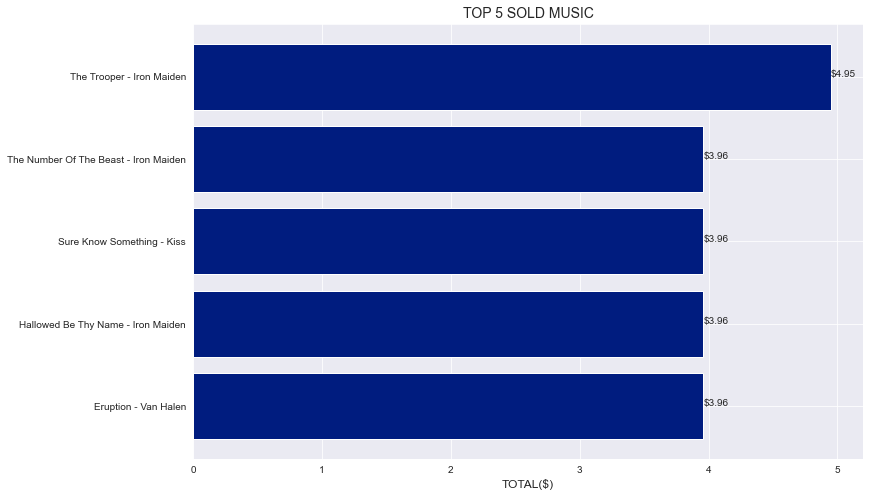

In [9]:
music_3 = q3.music_artist
total_3 = q3.total_val

plt.figure(figsize=(12, 8))

with sns.color_palette("dark"):
    ind_y = music_3.values 
    value_y = total_3.values

    plt.barh(ind_y, value_y)

    plt.title("Top 5 sold music".upper(), fontsize=14, loc="center")

    plt.xlabel("Total($)".upper(), fontsize=12)
    
    for i in range(len(total_3)):
        plt.annotate("$" + str(total_3[i]), xy=(total_3[i],music_3[i]))

plt.show()


4 - For each genre, which employee sold the most and how much?

In [10]:
q4

,genre_,employee_,total_
0,Rock,Jane Peacock,300.96
1,Latin,Jane Peacock,137.61
2,Metal,Margaret Park,96.03
3,Alternative & Punk,Steve Johnson,88.11
4,TV Shows,Jane Peacock,37.81
5,Jazz,Jane Peacock,33.66
6,Blues,Steve Johnson,24.75
7,Drama,Margaret Park,21.89
8,Sci Fi & Fantasy,Jane Peacock,19.90
9,Classical,Jane Peacock,18.81


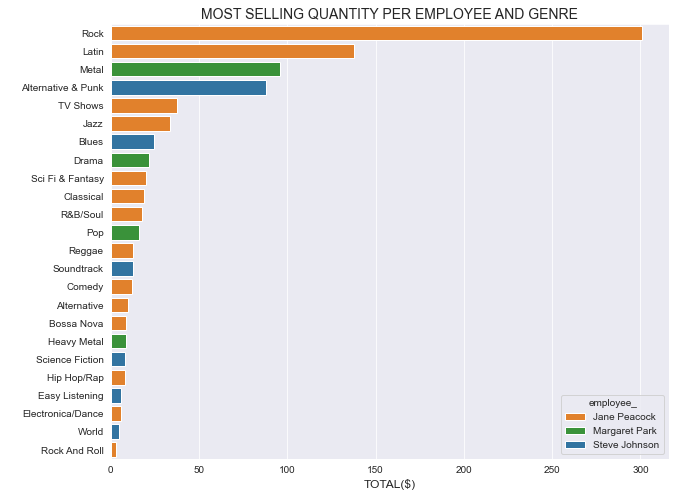

In [11]:
genre_ = q4.genre_
total_ = q4.total_
palette ={"Jane Peacock":"C1","Steve Johnson":"C0","Margaret Park":"C2"}

ax = plt.figure(figsize=(10,8))
ax = sns.barplot(data=q4, x='total_', y='genre_', hue='employee_', palette=palette, dodge=False)

ax = plt.title("most selling quantity per employee and genre".upper(), fontsize=14, loc="center")

ax = plt.xlabel("Total($)".upper(), fontsize=12)
ax = plt.ylabel(" ".upper(), fontsize=12)

5 - Which 5 tracks of the Brazilian genre were the most sold(quantity and value)? What are the artists on these tracks?

In [12]:
q5 = q5.reindex(q5.total_val.sort_values().index)
q5

,music,artist_,total_quant,total_val
0,A Novidade (Live),Gilberto Gil,2,1.98
1,Açai,Djavan,2,1.98
2,Esquinas,Djavan,2,1.98
3,Não Quero Dinheiro,Tim Maia,2,1.98
4,Tarde Em Itapoã,Antônio Carlos Jobim,2,1.98


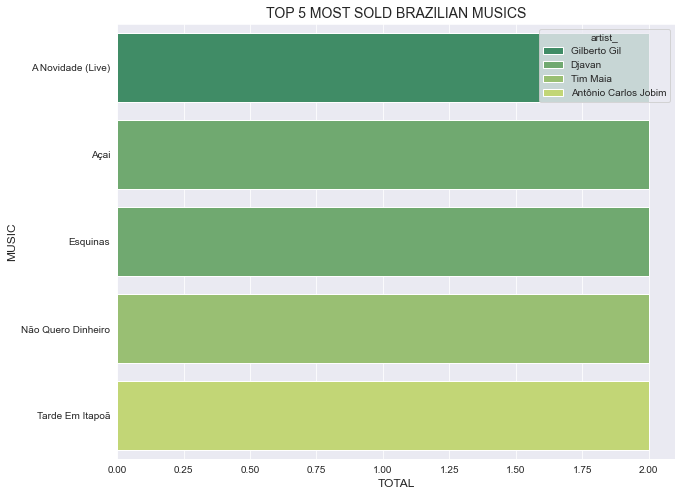

In [13]:
ax = plt.figure(figsize=(10,8))
ax = sns.barplot(data=q5, x='total_quant', y='music', hue='artist_', palette="summer", dodge=False)

ax = plt.title("Top 5 most sold brazilian musics".upper(), fontsize=14, loc="center")

ax = plt.ylabel("Music".upper(), fontsize=12)
ax = plt.xlabel("Total".upper(), fontsize=12)



6 - How many Blues songs were purchased each year?

In [14]:
q6

,year_,name_,total_quant
0,2011,Blues,20
1,2009,Blues,11
2,2010,Blues,11
3,2013,Blues,10
4,2012,Blues,9


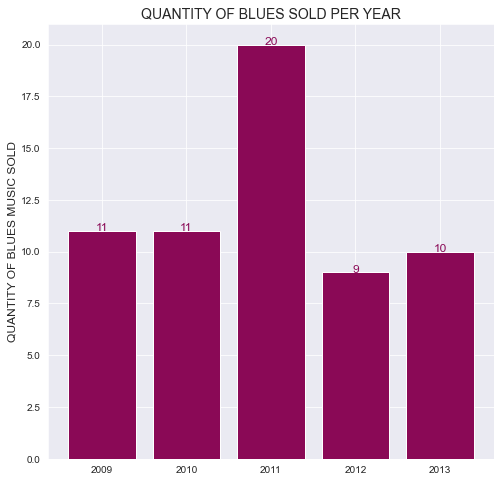

In [15]:
year_6 = q6.year_
quant_blues = q6.total_quant

plt.figure(figsize=(8, 8))

ind_y = year_6.values 
value_y = quant_blues.values

plt.bar(ind_y, value_y, color="#8A0956")

plt.title("Quantity of Blues sold per year".upper(), fontsize=14, loc="center")

plt.ylabel("Quantity of Blues Music sold".upper(), fontsize=12)
    
for i in range(len(year_6)):
    plt.annotate(str(quant_blues[i]), xy=(year_6[i],quant_blues[i]), ha="center", fontsize=12, color="#8A0956")

plt.show()


7 - What is the percentage of consumption for each genre?

In [16]:
q7 = q7.reindex(q7.percentage_.sort_values().index)
total = sum(q7.percentage_.values)
total

100.0

In [17]:
q7

,genre_,percentage_
23,Science Fiction,0.3
22,Rock And Roll,0.3
21,Easy Listening,0.4
20,Comedy,0.4
19,Heavy Metal,0.5
18,Electronica/Dance,0.5
17,World,0.6
16,Alternative,0.6
15,Bossa Nova,0.7
14,Hip Hop/Rap,0.8


In [18]:
for i in q7.percentage_:
    if i<10:
        others = i+1
others

4.6

In [19]:
df2 = pd.DataFrame({"genre_":["Others"], "percentage_":[others]})
q7 = q7.append(df2)
q7 = q7.sort_values(by= "percentage_", ascending=False).reset_index(drop=True)
q7 

,genre_,percentage_
0,Rock,37.3
1,Latin,17.2
2,Metal,11.8
3,Alternative & Punk,10.9
4,Others,4.6
5,Jazz,3.6
6,Blues,2.7
7,TV Shows,2.1
8,Classical,1.8
9,R&B/Soul,1.8


In [20]:
ind = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
q7 = q7.drop(ind)
q7

,genre_,percentage_
0,Rock,37.3
1,Latin,17.2
2,Metal,11.8
3,Alternative & Punk,10.9
4,Others,4.6


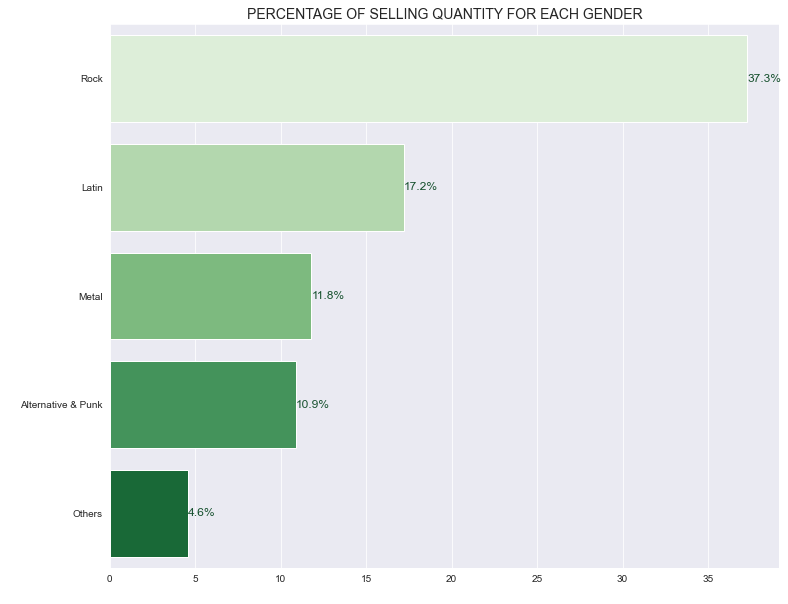

In [21]:
perc_ = q7.percentage_
genero_ = q7.genre_ 

ax = plt.figure(figsize=(12,10))
ax = sns.barplot(data=q7, x='percentage_', y='genre_', palette="Greens", dodge=False)
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{}%'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center', fontsize=12, color="#15502D")  # vertical alignment)
ax = plt.ylabel(" ")
ax = plt.xlabel(" ")

plt.title("Percentage of Selling Quantity for each gender".upper(), fontsize=14, loc="center")
plt.show;


8 - How is the mean for rock songs purchased for each month in every year (2009-2013)?

In [22]:
q8.head()

,month_,year_,total_quant
0,1,2009,17
1,2,2009,7
2,3,2009,9
3,4,2009,22
4,5,2009,8


In [23]:
month_dic = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 
             6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 
             11: "Nov", 12: "Dec"}

q8["month_"] = q8["month_"].map(month_dic)
q8

,month_,year_,total_quant
0,Jan,2009,17
1,Feb,2009,7
2,Mar,2009,9
3,Apr,2009,22
4,May,2009,8
5,Jun,2009,16
6,Jul,2009,19
7,Aug,2009,20
8,Sep,2009,5
9,Oct,2009,20


In [24]:
mean_q8 = q8.groupby("month_")["total_quant"].mean()
mean_q8

month_
Apr    12.0
Aug    14.6
Dec    13.8
Feb    19.4
Jan    12.6
Jul    16.6
Jun    15.4
Mar     8.4
May    13.6
Nov    12.2
Oct    15.2
Sep    13.2
Name: total_quant, dtype: float64

In [25]:
new_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

mean_q8 = mean_q8.reindex(new_order, axis=0)

In [26]:
mean_q8

month_
Jan    12.6
Feb    19.4
Mar     8.4
Apr    12.0
May    13.6
Jun    15.4
Jul    16.6
Aug    14.6
Sep    13.2
Oct    15.2
Nov    12.2
Dec    13.8
Name: total_quant, dtype: float64

In [27]:
month_ = mean_q8.index.values.tolist()
total_quant = mean_q8.values.tolist()

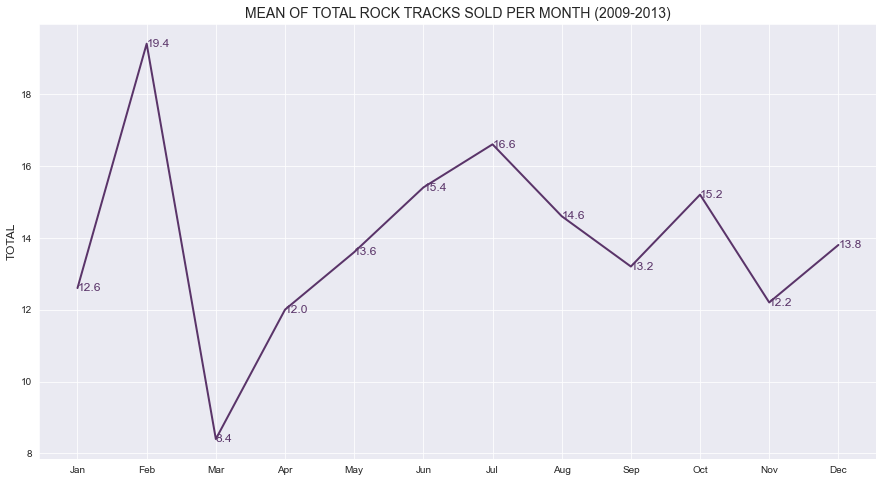

In [28]:
ax = plt.figure(figsize=(15,8))
ax = plt.plot(month_, total_quant, color="#5A3469", linestyle="-", linewidth=2)
ax = plt.title("Mean of Total Rock Tracks sold per month (2009-2013)".upper(), fontsize=14, loc="center")
ax = plt.ylabel("Total".upper(), fontsize=12)
ax = plt.xlabel(" ".upper(), fontsize=12)

for a,b in zip(month_, total_quant): 
    plt.text(a, b, str(b), verticalalignment='center', fontsize=12, color="#5A3469")
plt.show();

9 - What are the 5 most purchased styles in the city of São Paulo?

In [29]:
q9

,genre_,total_quant
0,Rock,40
1,Latin,18
2,Alternative & Punk,5
3,Metal,5
4,Reggae,3


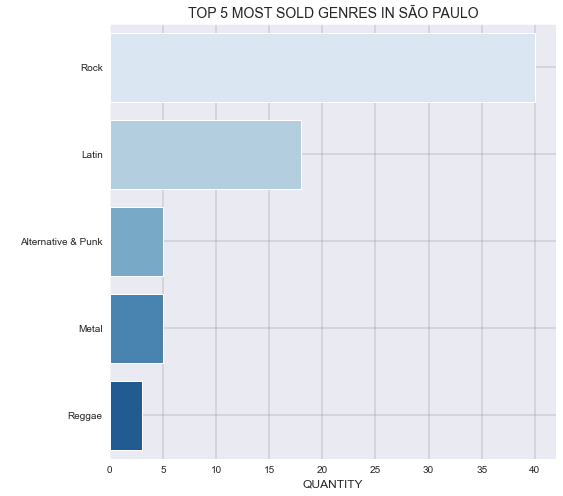

In [30]:
gen_ = q9.genre_
total_quant = q9.total_quant

plt.figure(figsize=(8, 8))

# ind_y = genre_.values 
# value_y = total_quant.values

ax = sns.barplot(data=q9, x='total_quant', y='genre_', palette="Blues", dodge=False)

ax = plt.title("Top 5 most sold genres in São Paulo".upper(), fontsize=14, loc="center")

ax = plt.xlabel("Quantity".upper(), fontsize=12)
ax = plt.ylabel(" ")


ax = plt.grid(color="grey", linewidth=0.4)


10 - What are the 5 most consumed playlists?

In [31]:
q10 = q10.reindex(q10.total_quant.sort_values().index)
q10

,name,total_quant
4,Brazilian Music,27
3,Classical,41
2,TV Shows,222
1,90’s Music,954
0,Music,4258


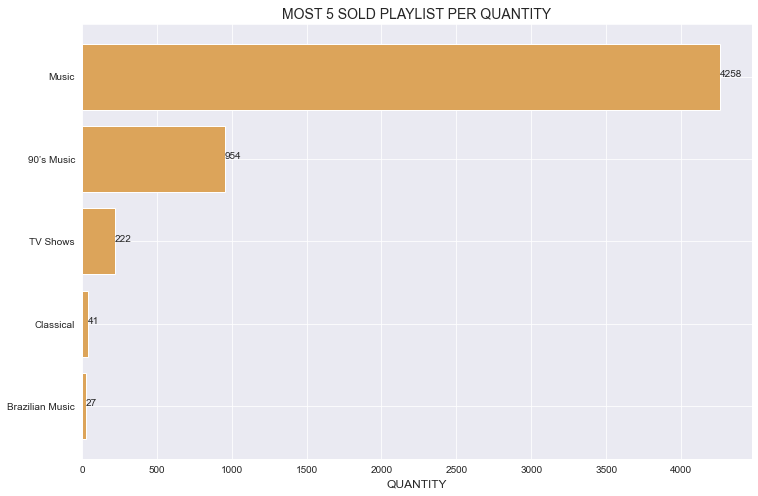

In [32]:
play_ = q10.name
total_quant = q10.total_quant

plt.figure(figsize=(12, 8))

ind_y = play_.values 
value_y = total_quant.values

plt.barh(ind_y, value_y, color="#DCA45A")

plt.title("Most 5 sold Playlist per Quantity".upper(), fontsize=14, loc="center")

plt.xlabel("Quantity".upper(), fontsize=12)
    
for i in range(len(total_quant)):
    plt.annotate(str(total_quant[i]), xy=(total_quant[i],play_[i]))

plt.show()
